In [1]:
DATA_PATH = 'redshifts.h5'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import splitter
from pipeline import model

%matplotlib inline

In [3]:
# TODO: This needs to go somewhere more sane. The splitter?
def get_colors(X):  # Warning: in-place
    u, g, r, i, z = X.T
    u_g = u - g
    u_r = u - r
    r_i = r - i
    i_z = i - z
    
    X[:,0] = r
    X[:,1] = u_g
    X[:,2] = u_r
    X[:,3] = r_i
    X[:,4] = i_z

data = splitter.load(DATA_PATH)
(train_X, train_y), (test_X, test_y) = splitter.split(data, train_n=1000000, test_n=500000)
train_X, train_y = train_X[:50000], train_y[:50000]
test_X, test_y = test_X[:50000], test_y[:50000]
get_colors(train_X)
get_colors(test_X)

In [4]:
# Heads up: this will take a while...
gp = model.AppxGPModelWithCV()
gp.fit(train_X, train_y)

In [5]:
predicted_y, sigmas_y = gp.predict(test_X, return_std=True)

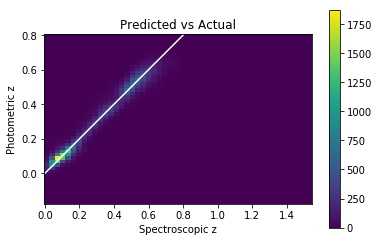

In [67]:
heatmap, xedges, yedges = np.histogram2d(test_y, predicted_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.plot([0, .8], [0, .8], 'w')
plt.xlabel('Spectroscopic z')
plt.ylabel('Photometric z')
plt.title('Predicted vs Actual')
plt.colorbar()

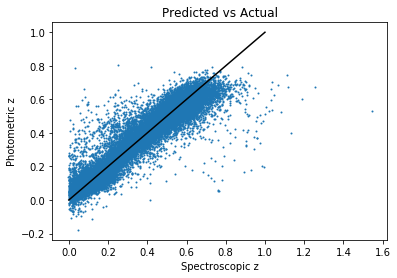

In [64]:
plt.scatter(test_y, predicted_y, s=1)
plt.plot([0, 1], [0, 1], 'k')
plt.xlabel('Spectroscopic z')
plt.ylabel('Photometric z')
plt.title('Predicted vs Actual')

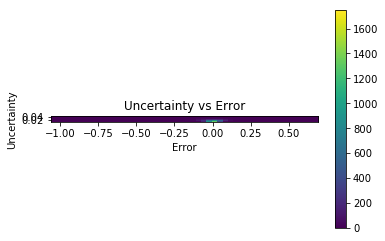

In [8]:
heatmap, xedges, yedges = np.histogram2d(predicted_y - test_y, sigmas_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('Error')
plt.ylabel('Uncertainty')
plt.title('Uncertainty vs Error')
plt.colorbar()

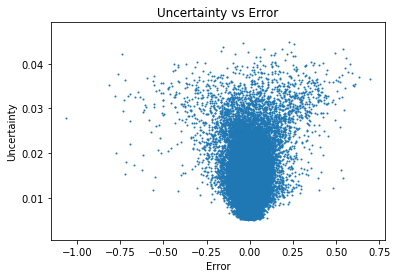

In [9]:
plt.scatter(predicted_y - test_y, sigmas_y, s=1)
plt.xlabel('Error')
plt.ylabel('Uncertainty')
plt.title('Uncertainty vs Error')

**This could be problematic.** The correlation between the error and the uncertainty is very weak.

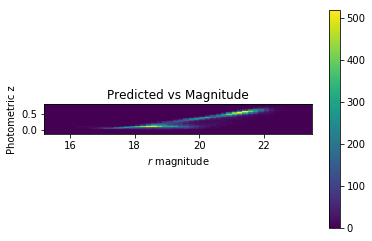

In [10]:
heatmap, xedges, yedges = np.histogram2d(test_X[:,0], predicted_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('$r$ magnitude')
plt.ylabel('Photometric z')
plt.title('Predicted vs Magnitude')
plt.colorbar()

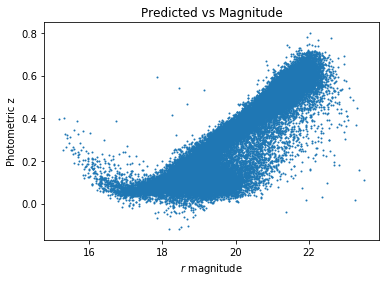

In [11]:
plt.scatter(test_X[:,0], predicted_y, s=1)
plt.xlabel('$r$ magnitude')
plt.ylabel('Photometric z')
plt.title('Predicted vs Magnitude')

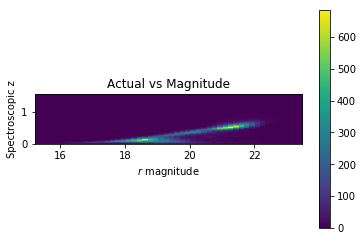

In [12]:
heatmap, xedges, yedges = np.histogram2d(test_X[:,0], test_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('$r$ magnitude')
plt.ylabel('Spectroscopic z')
plt.title('Actual vs Magnitude')
plt.colorbar()

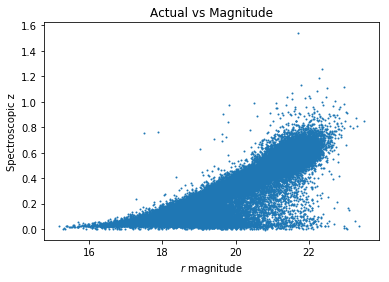

In [13]:
plt.scatter(test_X[:,0], test_y, s=1)
plt.xlabel('$r$ magnitude')
plt.ylabel('Spectroscopic z')
plt.title('Actual vs Magnitude')

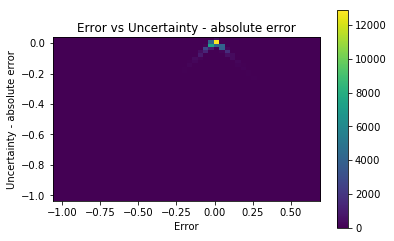

In [14]:
error_y = predicted_y - test_y

heatmap, xedges, yedges = np.histogram2d(error_y, sigmas_y - np.abs(error_y), bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('Error')
plt.ylabel('Uncertainty - absolute error')
plt.title('Error vs Uncertainty - absolute error')
plt.colorbar()

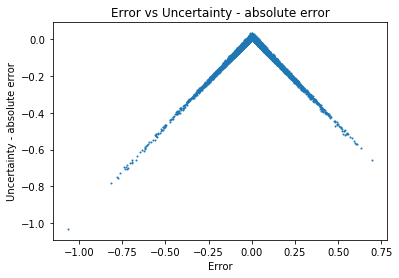

In [15]:
error_y = predicted_y - test_y

plt.scatter(error_y, sigmas_y - np.abs(error_y), s=1)
plt.xlabel('Error')
plt.ylabel('Uncertainty - absolute error')
plt.title('Error vs Uncertainty - absolute error')

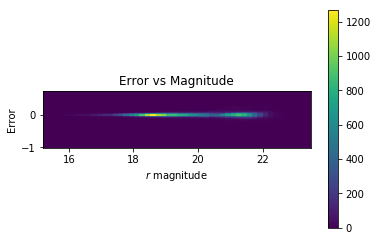

In [70]:
error_y = predicted_y - test_y

heatmap, xedges, yedges = np.histogram2d(test_X[:,0], error_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('$r$ magnitude')
plt.ylabel('Error')
plt.title('Error vs Magnitude')
plt.colorbar()

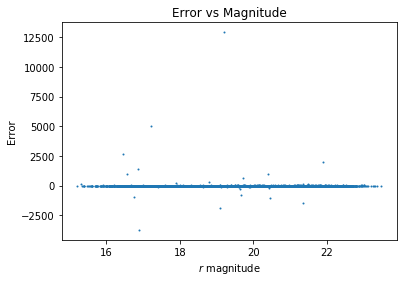

In [74]:
rel_error_y = predicted_y / test_y

plt.scatter(test_X[:,0], rel_error_y, s=1)
plt.xlabel('$r$ magnitude')
plt.ylabel('Error')
plt.title('Error vs Magnitude')